## 데이터 분석

- 데이터 정보 : 2019년도 서울에 위치하고 있는 주유소의 위치정보 및 일간 유가

(1) 고급휘발유 0인 값 108256개    /    실내등유 0인 값 110560개    /    전체 데이터 181714개  
즉 고급휘발유와 실내등유를 보유하지 않은 주유소가 많다.  

(2) 휘발유나 경유가 0인 데이터는 전체 데이터 대비 비율이 적기때문에 바로 삭제처리

(3) 도로명 column 추가

(4) 웹 데이터 크롤링

(5) 상,하반기 결합

(6) 기간 컬럼 dataTime으로 형변환 > 년 월 일 요일 컬럼 생성

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

[웹 데이터 크롤링]

In [3]:
# 한글문제 해결
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~')

# 1. 데이터 불러오기

#### 상반기 주유소 판매 데이터 불러오기

In [4]:
first = pd.read_csv('../data/2019년 상반기 주유소 판매가격.csv',encoding='cp949')
first

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0
...,...,...,...,...,...,...,...,...,...,...,...
90585,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20190626,GS칼텍스,셀프,0,1529,1389,0
90586,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20190627,GS칼텍스,셀프,0,1529,1389,0
90587,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20190628,GS칼텍스,셀프,0,1529,1389,0
90588,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20190629,GS칼텍스,셀프,0,1529,1389,0


In [5]:
second = pd.read_csv('../data/2019년 하반기 주유소 판매가격.csv',encoding='cp949')
second

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190701,SK에너지,셀프,1777,1577,1477,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190702,SK에너지,셀프,1777,1577,1477,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190703,SK에너지,셀프,1777,1577,1477,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190704,SK에너지,셀프,1777,1577,1477,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190705,SK에너지,셀프,1777,1577,1477,0
...,...,...,...,...,...,...,...,...,...,...,...
91119,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100
91120,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100
91121,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100
91122,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100


In [6]:
# 상반기 판매가격 데이터 프레임 결측치 조회
first.isna().sum()

번호       0
지역       0
상호       0
주소       0
기간       0
상표       0
셀프여부     0
고급휘발유    0
휘발유      0
경유       0
실내등유     0
dtype: int64

In [7]:
# 하반기 판매가격 데이터 프레임 결측치 조회
second.isna().sum()

번호       0
지역       0
상호       0
주소       0
기간       0
상표       0
셀프여부     0
고급휘발유    0
휘발유      0
경유       0
실내등유     0
dtype: int64

[웹 데이터 크롤링]

In [8]:
from selenium import webdriver

In [9]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [10]:
#네이버에 접속
driver = webdriver.Chrome('chromedriver')
driver.get('http://naver.com')

In [11]:
# BeautifulSoup를 이용해서 페이지 내용 읽어오기
from bs4 import BeautifulSoup

html = driver.page_source # 현재 Selenium이 접근한 페이지 소스를 넘겨 받는다. 
soup = BeautifulSoup(html, 'html.parser')

In [12]:
driver.get('http://www.opinet.co.kr/searRgSelect.do')
driver.get('http://www.opinet.co.kr/searRgSelect.do')

In [13]:
# 종로구라는 글자가 보이는 리스트 박스의 XPath를 이용하여 element를 찾고 gu_list_raw 변수에 저장한다.
gu_list_raw = driver.find_element_by_xpath('''//*[@id="SIGUNGU_NM0"]''')

In [14]:
# 구 리스트는 find_elements_by_tag_name으로 option이라는 태그를 찾으면 된다.
gu_list = gu_list_raw.find_elements_by_tag_name('option')


In [15]:
gu_names = [option.get_attribute('value') for option in gu_list]
gu_names.remove('')
gu_names

['가평군',
 '고양시',
 '고양시덕양구',
 '고양시일산동구',
 '고양시일산서구',
 '과천시',
 '광명시',
 '광주시',
 '구리시',
 '군포시',
 '김포시',
 '남양주시',
 '동두천시',
 '부천시',
 '성남시',
 '성남시분당구',
 '성남시수정구',
 '성남시중원구',
 '수원시',
 '수원시권선구',
 '수원시영통구',
 '수원시장안구',
 '수원시팔달구',
 '시흥시',
 '안산시',
 '안산시단원구',
 '안산시상록구',
 '안성시',
 '안양시',
 '안양시동안구',
 '안양시만안구',
 '양주시',
 '양평군',
 '여주시',
 '연천군',
 '오산시',
 '용인시',
 '용인시기흥구',
 '용인시수지구',
 '용인시처인구',
 '의왕시',
 '의정부시',
 '이천시',
 '파주시',
 '평택시',
 '포천시',
 '하남시',
 '화성시']

In [16]:
#gu_names에서 첫번째 것을 한번 시험 삼아 입력해보자.
element = driver.find_element_by_id('SIGUNGU_NM0')
element.send_keys(gu_names[0])

In [17]:
#조회버튼의 Xpath를 찾아서 클릭
xpath ='''//*[@id="searRgSelect"]/span'''
element_sel_gu = driver.find_element_by_xpath(xpath).click()

In [18]:
# #엑셀 저장 버튼을 눌러서 엑셀 내용으로 저장하자.
# xpath = '''//*[@id="glopopd_excel"]/span'''
# element_get_excel = driver.find_element_by_xpath(xpath).click()

In [19]:
# import time
# from tqdm import tqdm_notebook

# for gu in tqdm_notebook(gu_names):
#     element = driver.find_element_by_id('SIGUNGU_NM0')
#     element.send_keys(gu)
    
#     time.sleep(2)
    
#     xpath ='''//*[@id="searRgSelect"]/span'''
#     element_sel_gu = driver.find_element_by_xpath(xpath).click()
    
#     time.sleep(1)
    
#     xpath = '''//*[@id="glopopd_excel"]/span'''
#     element_get_excel = driver.find_element_by_xpath(xpath).click()
    
#     time.sleep(1)

In [20]:
# 드라이버를 닫고, 이제 저장된 엑셀 파일로 셀프 주유소가 실제로 저렴한지 여부를 확인해 보자.
driver.close()

- 구별 주유 가격에 대한 데이터의 정리
다운받은 25개의 엑셀 파일을 이전처럼 read를 이용하여 읽으면 25줄을 입력해야지만 모두 읽을 수 있지만 파이썬의 glob 모듈을 사용하면 손쉽게 열 수 있다.

In [21]:
from glob import glob

In [22]:
# 지역*.xls는 지역으로 시작하면서 확장자가 xls인 파일들
glob('./주유소위치폴더/지역*.xls')

['./주유소위치폴더\\지역_위치별(주유소) (1).xls',
 './주유소위치폴더\\지역_위치별(주유소) (10).xls',
 './주유소위치폴더\\지역_위치별(주유소) (11).xls',
 './주유소위치폴더\\지역_위치별(주유소) (12).xls',
 './주유소위치폴더\\지역_위치별(주유소) (13).xls',
 './주유소위치폴더\\지역_위치별(주유소) (14).xls',
 './주유소위치폴더\\지역_위치별(주유소) (15).xls',
 './주유소위치폴더\\지역_위치별(주유소) (16).xls',
 './주유소위치폴더\\지역_위치별(주유소) (17).xls',
 './주유소위치폴더\\지역_위치별(주유소) (18).xls',
 './주유소위치폴더\\지역_위치별(주유소) (19).xls',
 './주유소위치폴더\\지역_위치별(주유소) (2).xls',
 './주유소위치폴더\\지역_위치별(주유소) (20).xls',
 './주유소위치폴더\\지역_위치별(주유소) (21).xls',
 './주유소위치폴더\\지역_위치별(주유소) (22).xls',
 './주유소위치폴더\\지역_위치별(주유소) (23).xls',
 './주유소위치폴더\\지역_위치별(주유소) (24).xls',
 './주유소위치폴더\\지역_위치별(주유소) (25).xls',
 './주유소위치폴더\\지역_위치별(주유소) (3).xls',
 './주유소위치폴더\\지역_위치별(주유소) (4).xls',
 './주유소위치폴더\\지역_위치별(주유소) (5).xls',
 './주유소위치폴더\\지역_위치별(주유소) (6).xls',
 './주유소위치폴더\\지역_위치별(주유소) (7).xls',
 './주유소위치폴더\\지역_위치별(주유소) (8).xls',
 './주유소위치폴더\\지역_위치별(주유소) (9).xls',
 './주유소위치폴더\\지역_위치별(주유소).xls']

In [23]:
# station_files 변수에 각 엑셀 파일의 경로와 이름을 리스트로 저장
stations_files = glob('./주유소위치폴더/지역*.xls')
stations_files

['./주유소위치폴더\\지역_위치별(주유소) (1).xls',
 './주유소위치폴더\\지역_위치별(주유소) (10).xls',
 './주유소위치폴더\\지역_위치별(주유소) (11).xls',
 './주유소위치폴더\\지역_위치별(주유소) (12).xls',
 './주유소위치폴더\\지역_위치별(주유소) (13).xls',
 './주유소위치폴더\\지역_위치별(주유소) (14).xls',
 './주유소위치폴더\\지역_위치별(주유소) (15).xls',
 './주유소위치폴더\\지역_위치별(주유소) (16).xls',
 './주유소위치폴더\\지역_위치별(주유소) (17).xls',
 './주유소위치폴더\\지역_위치별(주유소) (18).xls',
 './주유소위치폴더\\지역_위치별(주유소) (19).xls',
 './주유소위치폴더\\지역_위치별(주유소) (2).xls',
 './주유소위치폴더\\지역_위치별(주유소) (20).xls',
 './주유소위치폴더\\지역_위치별(주유소) (21).xls',
 './주유소위치폴더\\지역_위치별(주유소) (22).xls',
 './주유소위치폴더\\지역_위치별(주유소) (23).xls',
 './주유소위치폴더\\지역_위치별(주유소) (24).xls',
 './주유소위치폴더\\지역_위치별(주유소) (25).xls',
 './주유소위치폴더\\지역_위치별(주유소) (3).xls',
 './주유소위치폴더\\지역_위치별(주유소) (4).xls',
 './주유소위치폴더\\지역_위치별(주유소) (5).xls',
 './주유소위치폴더\\지역_위치별(주유소) (6).xls',
 './주유소위치폴더\\지역_위치별(주유소) (7).xls',
 './주유소위치폴더\\지역_위치별(주유소) (8).xls',
 './주유소위치폴더\\지역_위치별(주유소) (9).xls',
 './주유소위치폴더\\지역_위치별(주유소).xls']

# 2. 데이터 결합

In [24]:
# 상반기와 하반기 데이터를 상하로 결합
df=pd.concat([first,second],ignore_index=True)
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0
...,...,...,...,...,...,...,...,...,...,...,...
181709,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100
181710,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100
181711,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100
181712,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100


[웹 데이터 크롤링]

In [25]:
# concat 명령으로 폴더내의 자료들을 합친다.
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

In [26]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 39
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      537 non-null    object
 1   상호      537 non-null    object
 2   주소      537 non-null    object
 3   상표      537 non-null    object
 4   전화번호    537 non-null    object
 5   셀프여부    537 non-null    object
 6   고급휘발유   537 non-null    object
 7   휘발유     537 non-null    object
 8   경유      537 non-null    object
 9   실내등유    537 non-null    object
dtypes: object(10)
memory usage: 46.1+ KB


In [27]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1435,1235,-
1,서울특별시,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,GS칼텍스,02-2226-4963,Y,-,1445,1245,-
2,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,-,1459,1259,-
3,서울특별시,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,02-3462-5100,Y,1612,1463,1259,-
4,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,1627,1473,1269,-


# 3. 데이터 가공 및 분석

In [28]:
# 데이터 프레임 정보 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181714 entries, 0 to 181713
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      181714 non-null  object
 1   지역      181714 non-null  object
 2   상호      181714 non-null  object
 3   주소      181714 non-null  object
 4   기간      181714 non-null  int64 
 5   상표      181714 non-null  object
 6   셀프여부    181714 non-null  object
 7   고급휘발유   181714 non-null  int64 
 8   휘발유     181714 non-null  int64 
 9   경유      181714 non-null  int64 
 10  실내등유    181714 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 15.3+ MB


In [29]:
# 상표 컬럼의 고유값 조회
df['상표'].unique()

array(['SK에너지', 'GS칼텍스', 'S-OIL', '현대오일뱅크', '알뜰주유소', 'NH-OIL', '알뜰(ex)',
       '자가상표'], dtype=object)

In [30]:
# 지역 컬럼의 고유값 조회
df['지역'].unique()

array(['서울 강남구', '서울 강동구', '서울 강북구', '서울 강서구', '서울 관악구', '서울 광진구',
       '서울 구로구', '서울 금천구', '서울 노원구', '서울 도봉구', '서울 동대문구', '서울 동작구',
       '서울 마포구', '서울 서대문구', '서울 서초구', '서울 성동구', '서울 성북구', '서울 송파구',
       '서울 양천구', '서울 영등포구', '서울 용산구', '서울 은평구', '서울 종로구', '서울 중구',
       '서울 중랑구'], dtype=object)

In [31]:
# 지역 컬럼의 값을 이용하여 시와 구를 분리
df['시'] = df['지역'].str.split(' ').str[0]
df['구'] = df['지역'].str.split(' ').str[1]
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0,서울,강남구
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0,서울,강남구
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0,서울,강남구
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0,서울,강남구
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0,서울,강남구


In [32]:
# 시 컬럼의 서울을 서울특별시로 변환
df['시'] = '서울특별시'
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구


In [33]:
# 기간 컬럼을 datetime 형식으로 변경
df['기간'] = pd.to_datetime(df['기간'],format='%Y%m%d')
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구


In [34]:
# 기간 컬럼에서 dt 타입을 이용하여 년, 월, 일, 요일 컬럼 생성
df['년'] = df['기간'].dt.year
df['월'] = df['기간'].dt.month
df['일'] = df['기간'].dt.day
df['요일'] = df['기간'].dt.day_name()
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,1,Tuesday
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,2,Wednesday
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,3,Thursday
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,4,Friday
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,5,Saturday


In [35]:
df[df['상호'] == '(주)동하힐탑셀프주유소']


,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,1,Tuesday
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,2,Wednesday
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,3,Thursday
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,4,Friday
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,5,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90769,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-12-27,SK에너지,셀프,1802,1657,1495,0,서울특별시,강남구,2019,12,27,Friday
90770,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-12-28,SK에너지,셀프,1802,1657,1495,0,서울특별시,강남구,2019,12,28,Saturday
90771,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-12-29,SK에너지,셀프,1802,1657,1495,0,서울특별시,강남구,2019,12,29,Sunday
90772,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-12-30,SK에너지,셀프,1802,1657,1495,0,서울특별시,강남구,2019,12,30,Monday


In [36]:
# 휘발유 가격이 비싼 5개 판매가격을 출력하세요.
df['휘발유'].sort_values(ascending=False).head()

177210    2356
177216    2356
177217    2356
177211    2356
177212    2356
Name: 휘발유, dtype: int64

In [37]:
# 휘발유 가격이 저렴한 5개 판매가격을 출력하세요. (단 휘발유가 0원인 데이터는 제외)
df[df['휘발유'] != 0]['휘발유'].sort_values().head(5)

13148    1255
82475    1260
82474    1260
82476    1260
82998    1265
Name: 휘발유, dtype: int64

In [38]:
df1 = df.copy()

In [39]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,1,Tuesday
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,2,Wednesday
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,3,Thursday
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,4,Friday
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,5,Saturday


[웹 데이터 크롤링]

In [40]:
# 원하는 컬럼만 가지고 오고 이름도 다시 정의해서 stations 변수에 저장
# 이 단원에서는 휘발유만 다루겠다.
stations = pd.DataFrame({'Oil_store': station_raw['상호'],
                         '주소': station_raw['주소'],
                         '가격': station_raw['휘발유'],
                         '셀프': station_raw['셀프여부'],
                         '상표': station_raw['상표']
                        })
stations.head()

,Oil_store,주소,가격,셀프,상표
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1435,Y,SK에너지
1,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,1445,Y,GS칼텍스
2,방죽주유소,서울 강남구 밤고개로 215 (율현동),1459,Y,GS칼텍스
3,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1463,Y,SK에너지
4,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1473,Y,현대오일뱅크


In [41]:
# 추가로 주소에서 구 이름만 추출하자.
# 빈칸을 기준으로 분리 후 2번째 단어 선택
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1435,Y,SK에너지,강남구
1,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,1445,Y,GS칼텍스,강남구
2,방죽주유소,서울 강남구 밤고개로 215 (율현동),1459,Y,GS칼텍스,강남구
3,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1463,Y,SK에너지,강남구
4,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1473,Y,현대오일뱅크,강남구


In [42]:
# head만 보기에는 문제 없으나 500여개의 데이터가 어떤 상태인지 확인하기 쉽지 않다.
# unique() 검사 수행
stations['구'].unique()

array(['강남구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '강동구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구',
       '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구'], dtype=object)

In [43]:
# 가격 컬럼의 unique를 구해보자.
stations['가격'].unique()

array(['1435', '1445', '1459', '1463', '1473', '1479', '1485', '1488',
       '1495', '1505', '1518', '1525', '1527', '1528', '1533', '1538',
       '1548', '1550', '1626', '1628', '1697', '1788', '1847', '1856',
       '1918', '1935', '1938', '1953', '1971', '1988', '2075', '-', 1412,
       1414, 1419, 1425, 1435, 1438, 1448, 1449, 1453, 1475, 1479, 1498,
       '1425', '1437', '1439', '1442', '1458', '1465', '1468', '1469',
       '1477', '1497', '1498', '1499', '1599', '1610', 1459, 1489, 1509,
       1565, '1457', '1466', '1467', '1557', '1689', '1757', 1434, 1439,
       1444, 1455, 1462, 1464, 1467, 1474, 1478, '1379', '1449', '1464',
       '1475', '1508', '1539', '1571', '1595', '1662', '1867', '1888',
       '1942', 1427, 1458, 1465, 1516, 1518, 1545, 1635, 1705, 1748, 1755,
       1398, 1428, 1437, 1442, 1457, 1499, 1440, 1443, 1454, 1463, 1468,
       1473, 1477, 1487, 1497, 1638, 1698, 1399, 1408, 1418, 1423, 1460,
       1480, 1519, 1694, 1697, 1476, 1488, 1494, 1495, 150

휘발유나 경유가 0인 데이터는 전체 데이터 대비 비율이 적기때문에 바로 삭제처리

In [44]:
drop_df = df1[(df1['휘발유'] == 0)  | (df1['경유'] ==0)]
print(f'기존데이터: {df1.shape[0]}개\n휘발유나 경유가 0인 데이터: {drop_df.shape[0]}개')
df1 = df1.drop(index=drop_df.index)
print(f'삭제 후 데이터: {df1.shape[0]}개')

기존데이터: 181714개
휘발유나 경유가 0인 데이터: 68개
삭제 후 데이터: 181646개


도로명 column 추가

In [45]:
df1['도로명'] = df1['주소'].str.split(' ').str[2]
df1.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일,도로명
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,1,Tuesday,논현로
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,2,Wednesday,논현로
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,3,Thursday,논현로
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,4,Friday,논현로
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,5,Saturday,논현로


[웹 데이터 크롤링]

In [46]:
# 숫자가 아닌 '-' 문자가 끼어있다.
stations[stations['가격']=='-']

,Oil_store,주소,가격,셀프,상표,구
38,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
39,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
21,신성주유소,서울 동대문구 장한로 29 (장안동),-,N,현대오일뱅크,동대문구
12,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
35,전당앞주유소,서울 서초구 남부순환로 2391 (서초동),-,N,SK에너지,서초구
30,성락주유소,서울 영등포구 가마산로 414 (신길동),-,Y,S-OIL,영등포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
10,에스씨(주) 역전주유소,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
15,CJ대한통운㈜ 신림주유소,서울 관악구 남부순환로 1515 (신림동),-,N,GS칼텍스,관악구
14,양지진흥개발(주)상계주유소,서울 노원구 노해로 527 (상계동),-,N,SK에너지,노원구


In [47]:
# '-' 문자가 포함된 데이터 제외시켜 버리기
stations = stations[stations['가격'] != '-']
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1435,Y,SK에너지,강남구
1,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,1445,Y,GS칼텍스,강남구
2,방죽주유소,서울 강남구 밤고개로 215 (율현동),1459,Y,GS칼텍스,강남구
3,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1463,Y,SK에너지,강남구
4,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1473,Y,현대오일뱅크,강남구


In [48]:
# 가격을 float 형으로 변환한다.
stations['가격'] = [float(value) for value in stations['가격']]

In [49]:
# 25개의 엑셀을 합쳤기 때문에 index가 중복될 수 있다.
# reset_index 명령으로 인덱스를 처음부터 다시 기록하자.
# index라는 컬럼이 하나 더 생기는데 그 부분을 제거한다.
stations.reset_index(inplace=True)
del stations['index']

In [50]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Oil_store  525 non-null    object 
 1   주소         525 non-null    object 
 2   가격         525 non-null    float64
 3   셀프         525 non-null    object 
 4   상표         525 non-null    object 
 5   구          525 non-null    object 
dtypes: float64(1), object(5)
memory usage: 24.7+ KB


## Visualization

#### 1) 기름 유형의 기간에 따른 가격 변동
- 목적: 기름 유형별 가격 변화 파악
- 시각화 채택 이유: 1년간 기름유형별 가격 등락 파악에 용이 

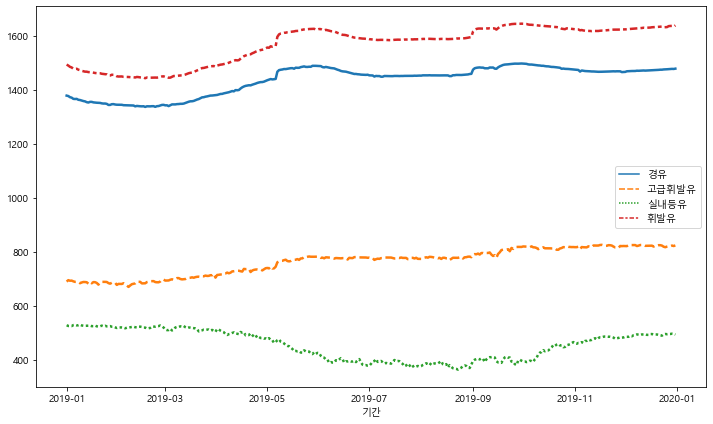

In [51]:
plt.figure(figsize=(12,7))
aaa = df.pivot_table(values=['휘발유', '경유','고급휘발유','실내등유'], index='기간')
sns.lineplot(data=aaa, palette="tab10", linewidth=2.5)
plt.show()

#### 2) 상표 및 셀프여부에 따른 분포 정리
- 목적: 서울시 내 각 정유사 및 주유유형별 분포를 확인하여 가장 대중화된 업체 및 주유형태 파악
- 시각화 채택 이유: 상표와 셀프여부에 따른 비중 파악에 용이하며, 자료 겹칩을 방지하기 위해 explode를 사용하여 가시성 증대

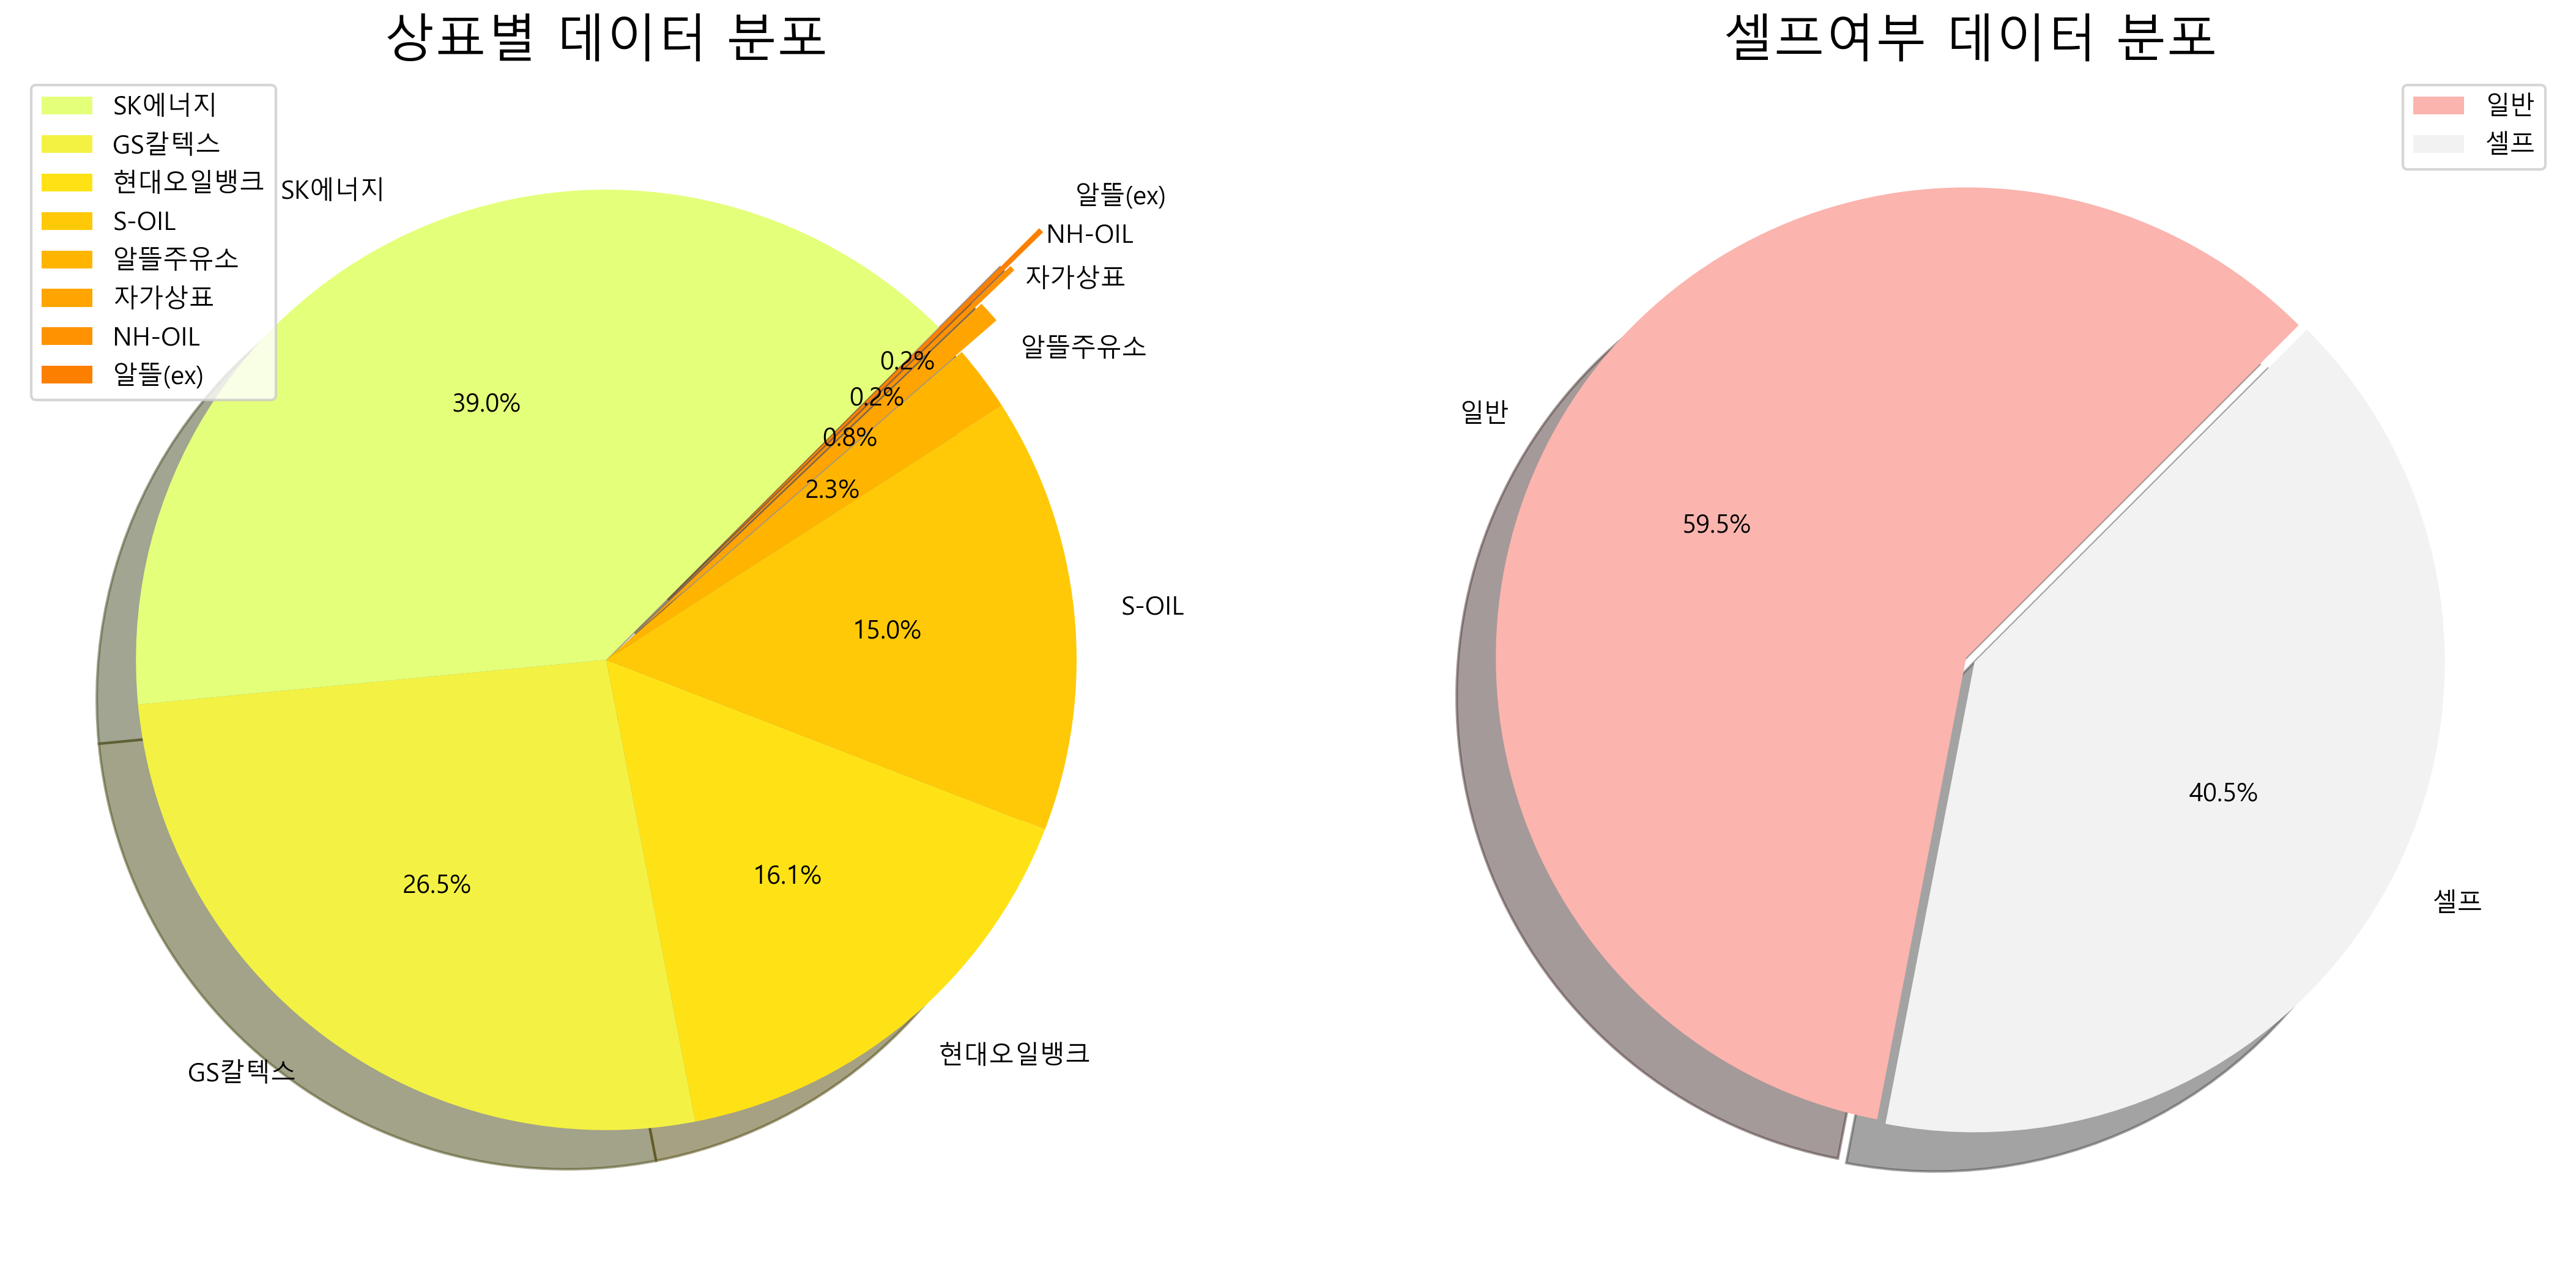

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(15,7), dpi=300)

count_df = df1[['상호','상표','셀프여부']].drop_duplicates()

size = count_df['상표'].value_counts()
labels = count_df['상표'].value_counts().index
colors=plt.cm.Wistia(np.linspace(0,1,count_df['상표'].value_counts().shape[0]))
explode = [0,0,0,0,0,0.1,0.2,0.3]

ax[0].pie(size, labels=labels, colors=colors, shadow=True, startangle=45, explode=explode,autopct='%.1f%%')
ax[0].set_title('상표별 데이터 분포',fontsize=20)
ax[0].legend()


size = count_df['셀프여부'].value_counts()
labels = count_df['셀프여부'].value_counts().index
colors = plt.cm.Pastel1(np.linspace(0, 1, 2))
explode = [0.01, 0.01]

ax[1].pie(size, labels=labels, colors=colors, shadow=True, startangle=45, explode=explode,autopct='%.1f%%')
ax[1].set_title('셀프여부 데이터 분포',fontsize=20)
ax[1].legend()

plt.tight_layout()
plt.show()

#### 3) 휘발유와 경유 가격의 분포

- 목적 : 1년간 유가가 어느 가격대에 많이 분포되어 있는지 확인

- 시각화 채택 이유 : 서울시의 1년간의 유가 정보를 통해 앞으로의 값에 대한 가능성의 정도를 추정하기에 용이

- 시각화를 통해 얻은 정보 : 휘발유와 경유의 분포 모양이 비슷하며 가우시안 분포를 어느정도 따라간다. 
        휘발유는 1400~1600원 경유는 1300~1500원 정도를 유지하였다.
    

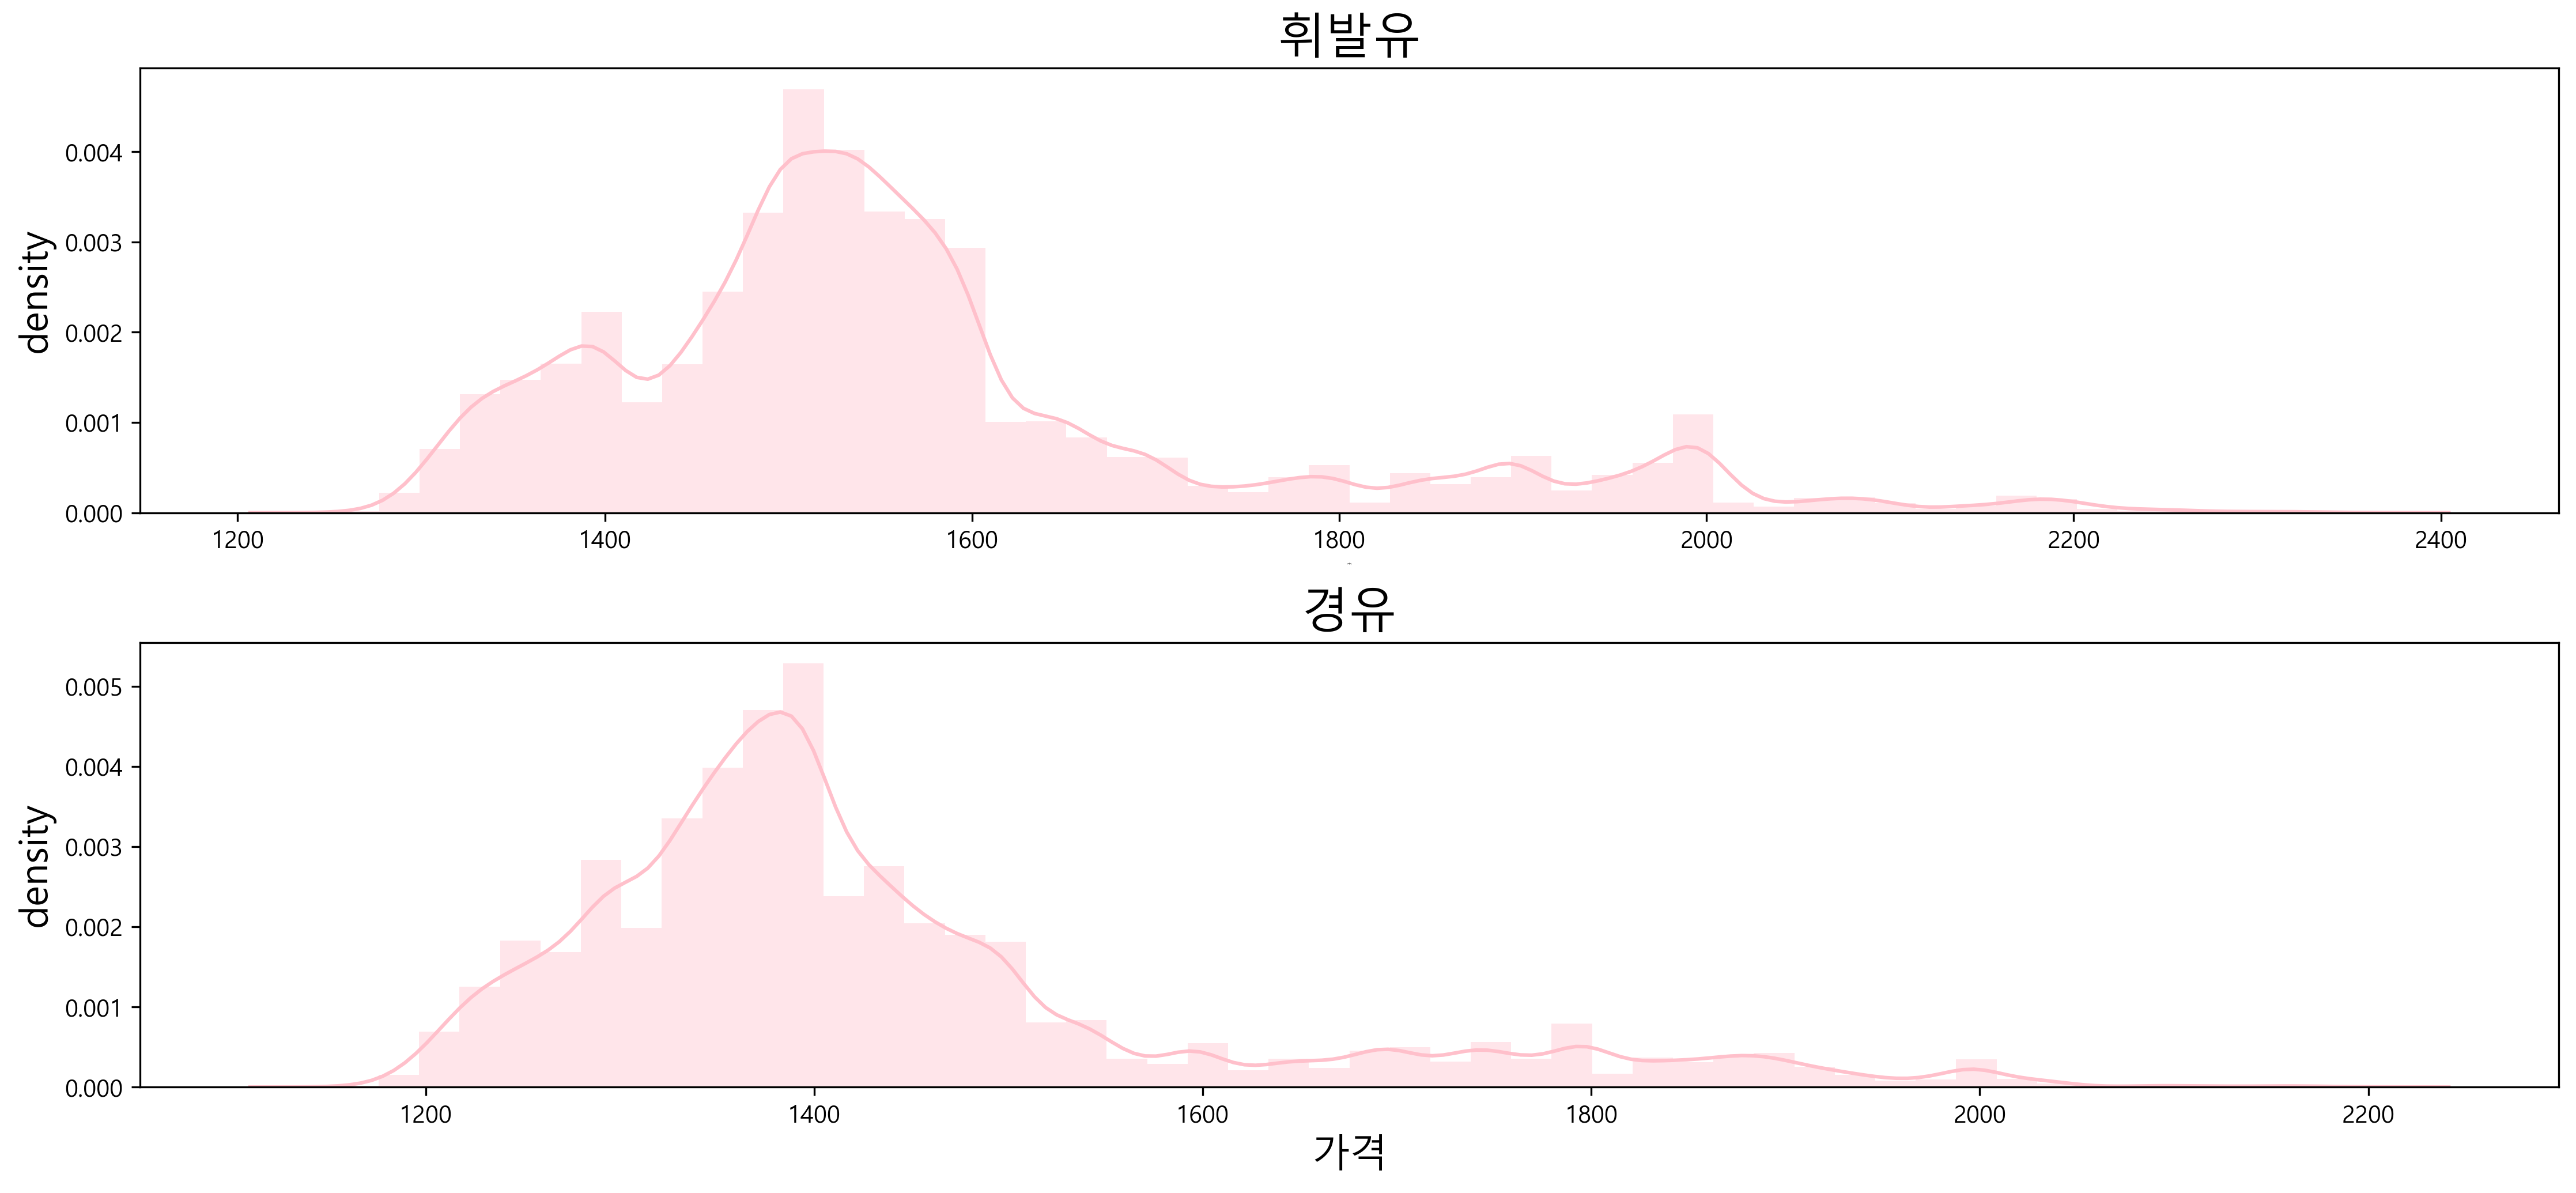

In [53]:
fig, ax = plt.subplots(2, 1, figsize=(15,7), dpi=300)

sns.distplot(df1['휘발유'], color = 'pink',ax=ax[0])
ax[0].set_title('휘발유', fontsize = 20)
ax[0].set_xlabel('가격', fontsize = 0)
ax[0].set_ylabel('density', fontsize = 16)

sns.distplot(df1['경유'], color = 'pink',ax=ax[1])
ax[1].set_title('경유', fontsize = 20)
ax[1].set_xlabel('가격', fontsize = 16)
ax[1].set_ylabel('density', fontsize = 16)

plt.tight_layout()
plt.show()

#### 4) 월간 고급휘발유와 실내등유의 평균 가격
- 목적: 시간의 흐름에 따른 고급휘발유와 실내등유의 가격 변동 파악
- 시각화 채택 이유: 어떤 시즌에 유가의 변동이 일어나는지 파악하는데 용이 - 시각화를 통해 얻은 정보 : 고급휘발유의 가격은 S/S 시즌에 높아지고 F/W 시즌에 낮아진다. 반면에 실내등유는 여름철에 가격이 낮아지고 겨울철에 높아진다. -> 수요가 많아지면서 가격또한 높아짐을 알 수 있다.  

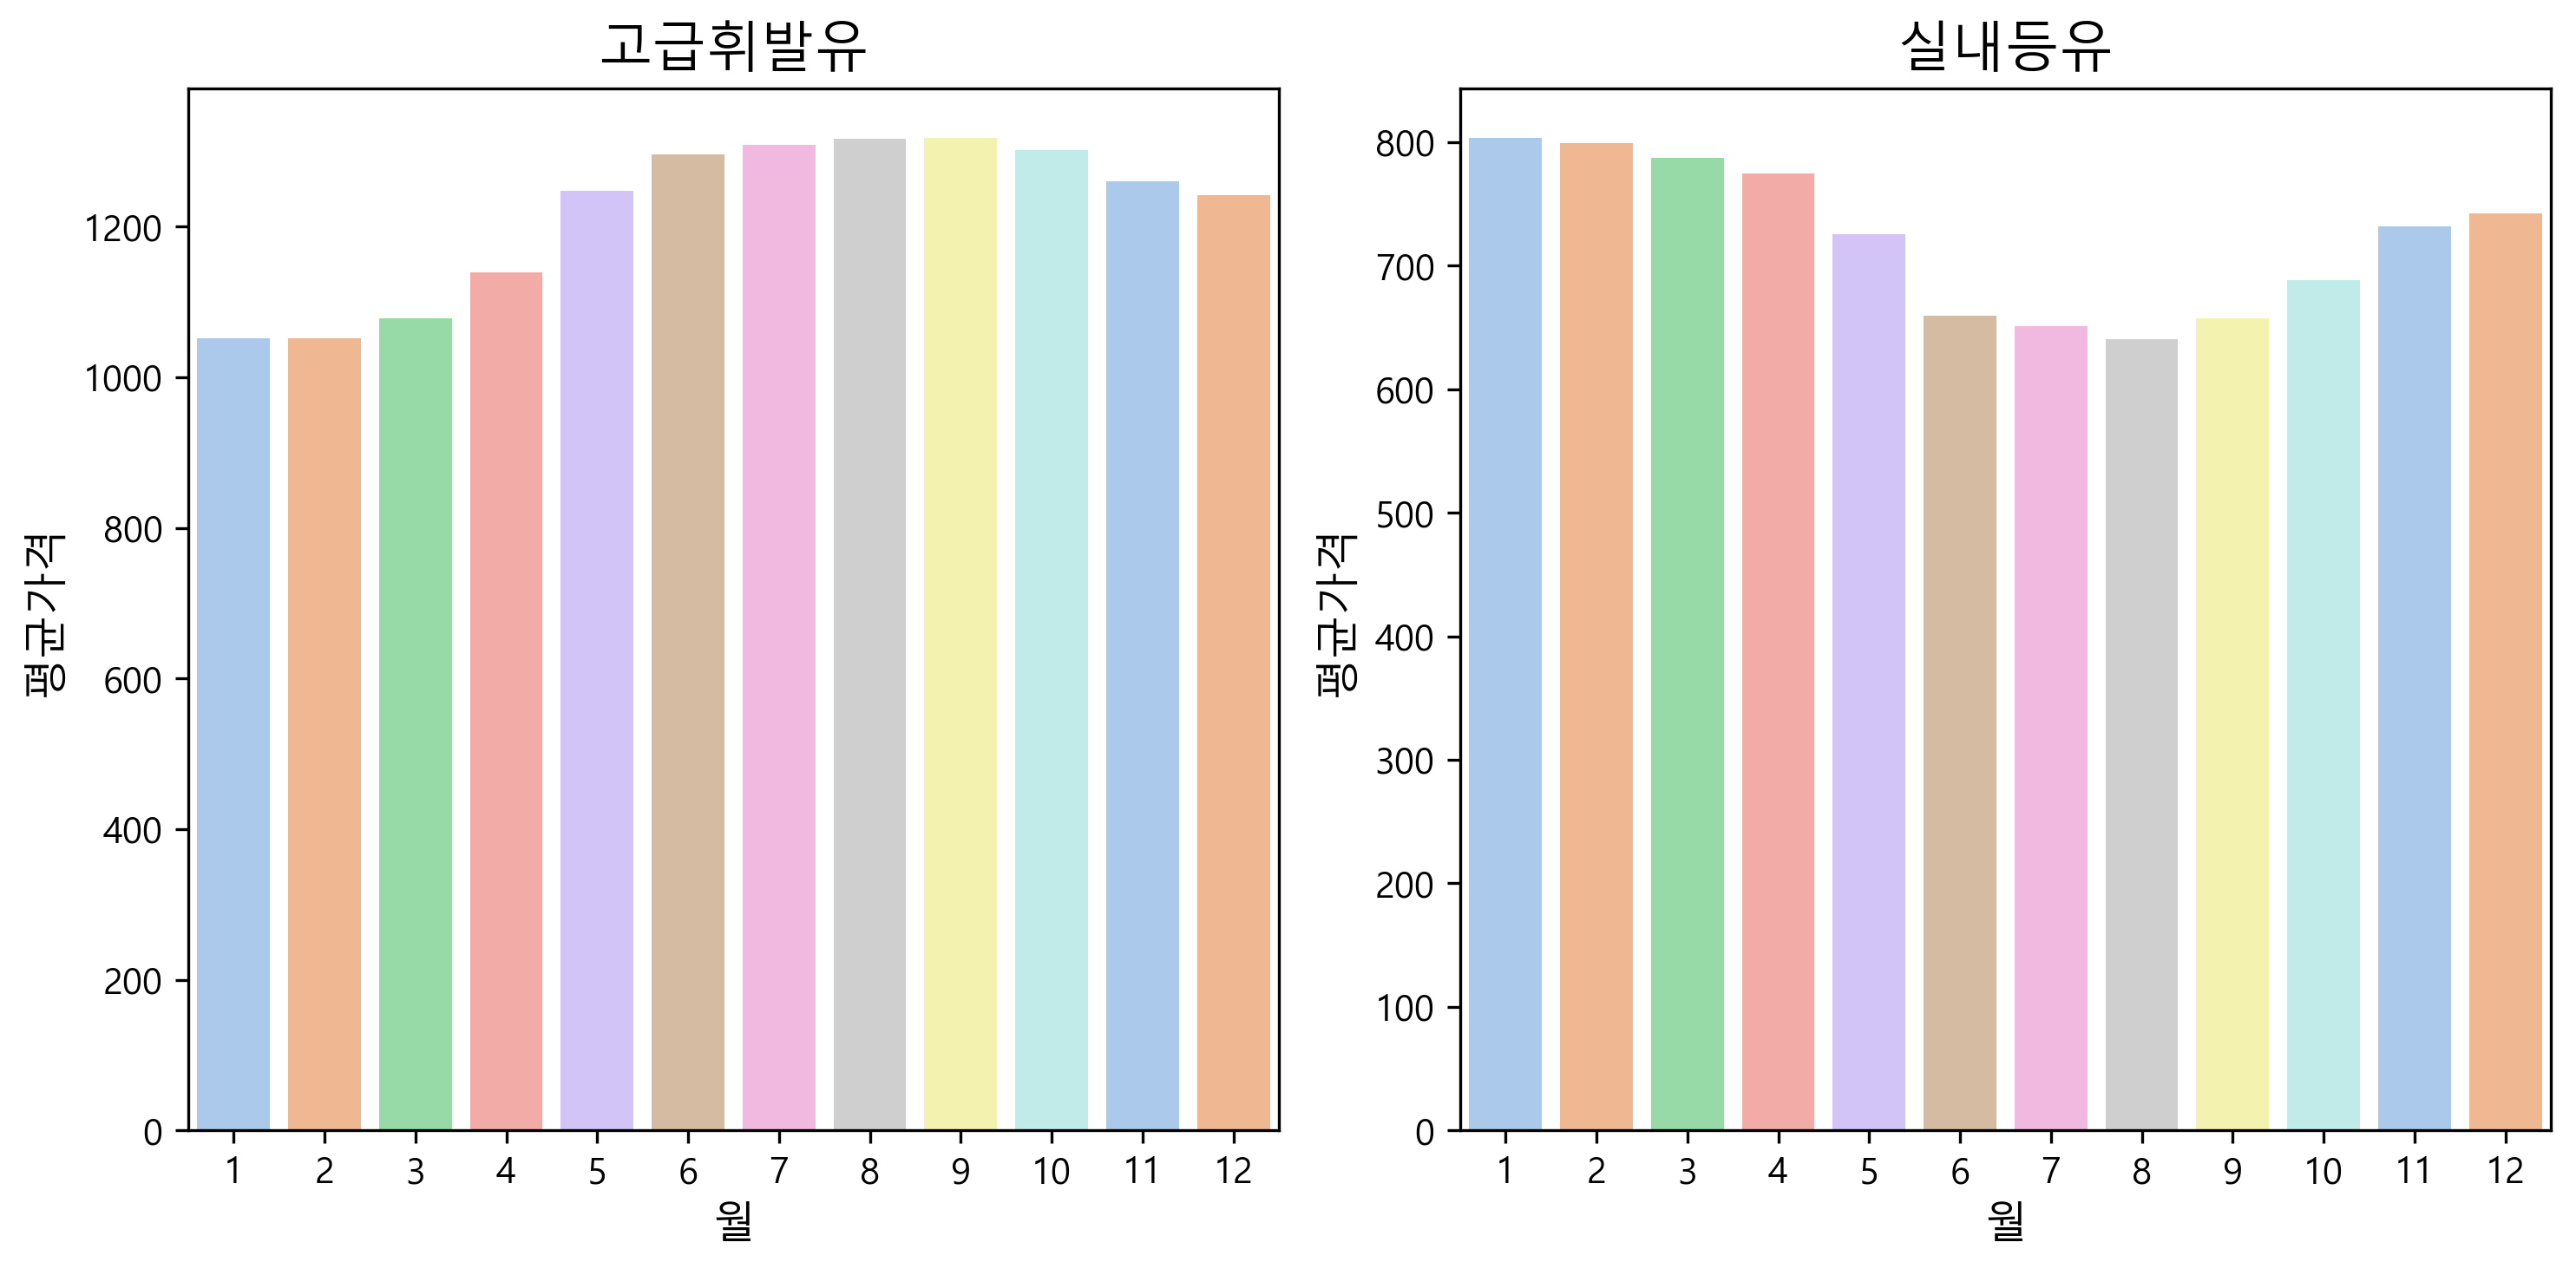

In [54]:
# 월별 고급휘발유, 실내등유 평균가격
data = df1[(df['고급휘발유'] != 0) | (df['실내등유'] !=0)]
data = data.pivot_table(index='월',values=['고급휘발유','실내등유'],aggfunc='mean').reset_index()

fig, ax = plt.subplots(1, 2, figsize=(10,5), dpi=300)

sns.barplot(x = data['월'], y = data['고급휘발유'], palette = 'pastel',ax=ax[0])
ax[0].set_xlabel(xlabel = '월', fontsize = 12)
ax[0].set_ylabel(ylabel = '평균가격', fontsize = 12)
ax[0].set_title(label = '고급휘발유', fontsize = 15)

sns.barplot(x = data['월'], y = data['실내등유'], palette = 'pastel',ax=ax[1])
ax[1].set_xlabel(xlabel = '월', fontsize = 12)
ax[1].set_ylabel(ylabel = '평균가격', fontsize = 12)
ax[1].set_title(label = '실내등유', fontsize = 15)

plt.tight_layout()
plt.show()

#### 5) 1년간 각 지역별 휘발유와 경유의 평균 가격
- 목적: 어느 지역이 가격대가 높게 형성되었고 또 어떤 지역이 가격대가 낮은지 확인

- 시각화 채택 이유: 가격대별로 지역들을 정렬하여 한눈에 각 지역의 유가를 파악하는데에 용이

,구,경유,휘발유
0,중구,1835.953011,1976.948052
1,용산구,1755.083886,1887.254609
2,종로구,1696.179182,1838.554945
3,강남구,1577.271600,1713.328332
4,마포구,1555.951075,1690.628367
5,성동구,1446.205749,1583.659561
6,서초구,1456.007124,1577.705147
7,강동구,1442.151680,1577.487784
8,영등포구,1442.211041,1568.256215
9,노원구,1402.993780,1531.221551


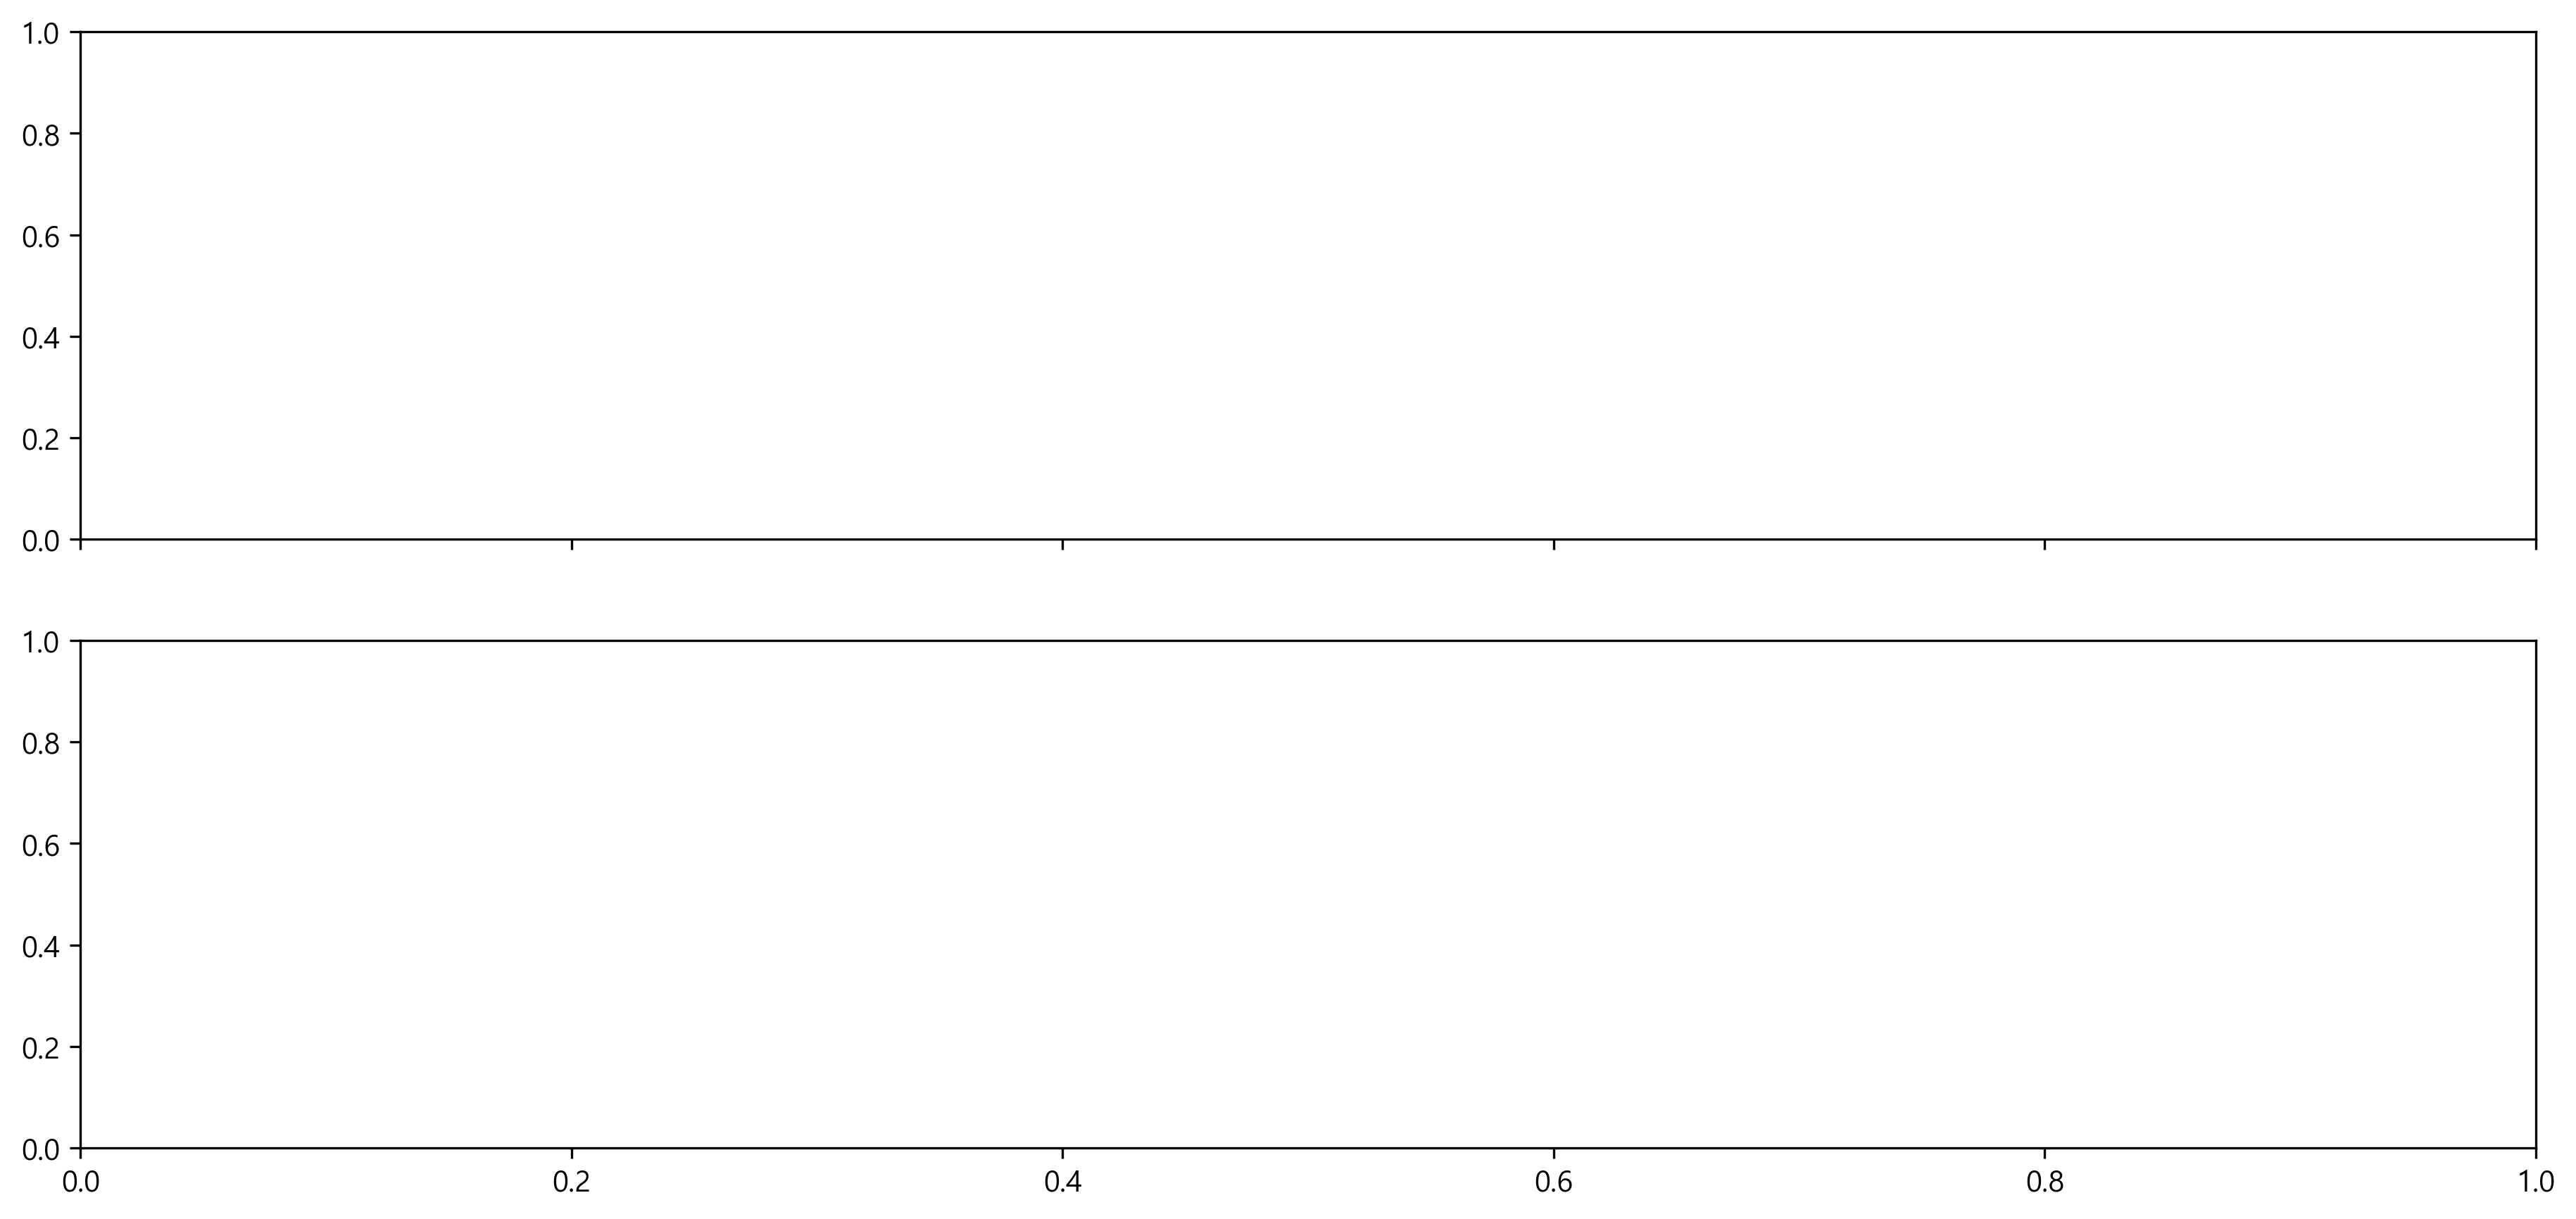

In [55]:
fig, ax = plt.subplots(2, 1, figsize=(15,7), dpi=300, sharex=True)

data = df1.pivot_table(index='구',values=['휘발유','경유']).sort_values(by='휘발유',ascending=False).reset_index()
data

In [77]:

sns.barplot(x = data['구'], y = data['휘발유'], palette = 'husl',ax=ax[0])
ax[0].set_xlabel(xlabel = '사라져', fontsize = 0)
ax[0].set_ylabel(ylabel = '평균가격', fontsize = 15)
ax[0].set_title(label = '휘발유', fontsize = 15)

sns.barplot(x = data['구'], y = data['경유'], palette = 'husl',ax=ax[1])
ax[1].set_xlabel(xlabel = '지역', fontsize = 15)
ax[1].set_ylabel(ylabel = '평균가격', fontsize = 15)
ax[1].set_title(label = '경유', fontsize = 15)

plt.tight_layout()
plt.show()

KeyError: '휘발유'

#### 6) 지역의 상표별 주유소 개수
- 목적: 지역별로 진출한 정유사 파악
- 시각화 채택 이유: 서울시 모든 지역별로 눈에 띄게 시장을 장악한 정유업체 파악에 용이

In [57]:
data = df1[['구','상호','상표','셀프여부']].drop_duplicates()
data

,구,상호,상표,셀프여부
0,강남구,(주)동하힐탑셀프주유소,SK에너지,셀프
181,강남구,(주)만정에너지,GS칼텍스,일반
362,강남구,(주)보성 세곡주유소,SK에너지,셀프
543,강남구,(주)선진도곡주유소,S-OIL,일반
724,강남구,(주)소모에너지엔테크놀러지 쎈트럴주유소,GS칼텍스,일반
...,...,...,...,...
157241,송파구,위례제일주유소,S-OIL,셀프
158498,송파구,현대오일뱅크㈜직영 잠실셀프주유소,현대오일뱅크,셀프
160206,양천구,가로공원주유소,SK에너지,일반
162586,양천구,현대오일뱅크(주)직영 양천셀프주유소,현대오일뱅크,셀프


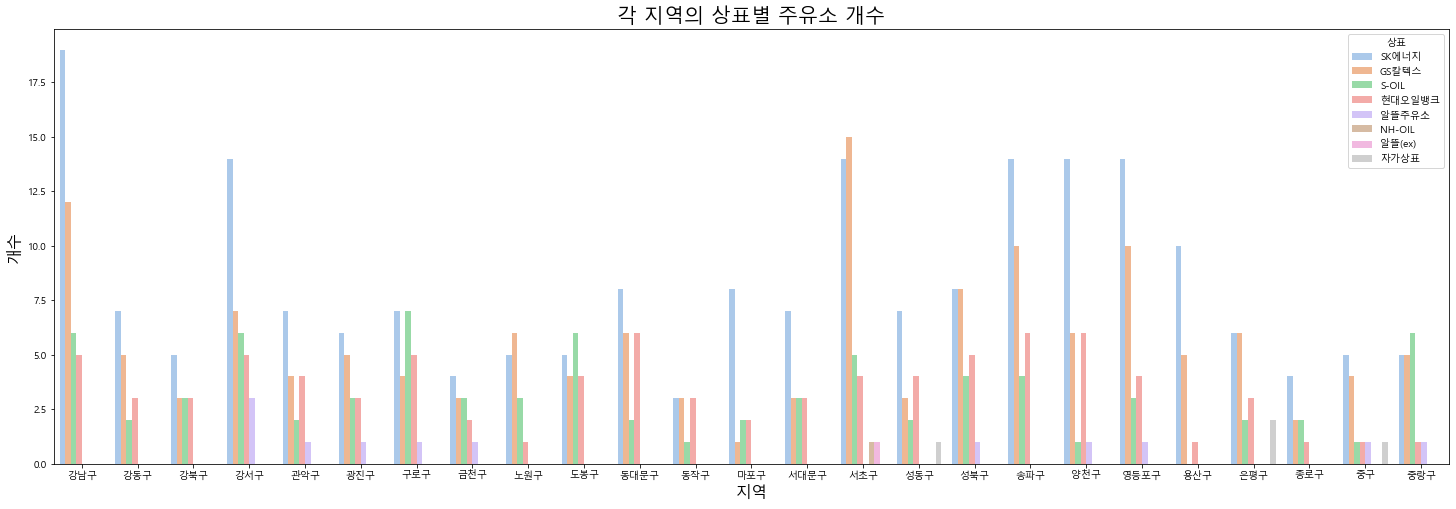

In [58]:
data = df1[['구','상호','상표','셀프여부']].drop_duplicates()

plt.figure(figsize = (25,8))
ax = sns.countplot(x = '구', data = data, palette = 'pastel',hue='상표')
ax.set_title(label = '각 지역의 상표별 주유소 개수', fontsize = 20)
ax.set_xlabel(xlabel = '지역', fontsize = 16)
ax.set_ylabel(ylabel = '개수', fontsize = 16)
plt.show()

#### 7) 상표별 휘발유 분포
- 목적: 주유형태에 따른 상표별 점유율 파악
- 시각화 채택 이유: 많은 데이터의 분포와 범위를 한눈에 보기 쉽게 나타냄

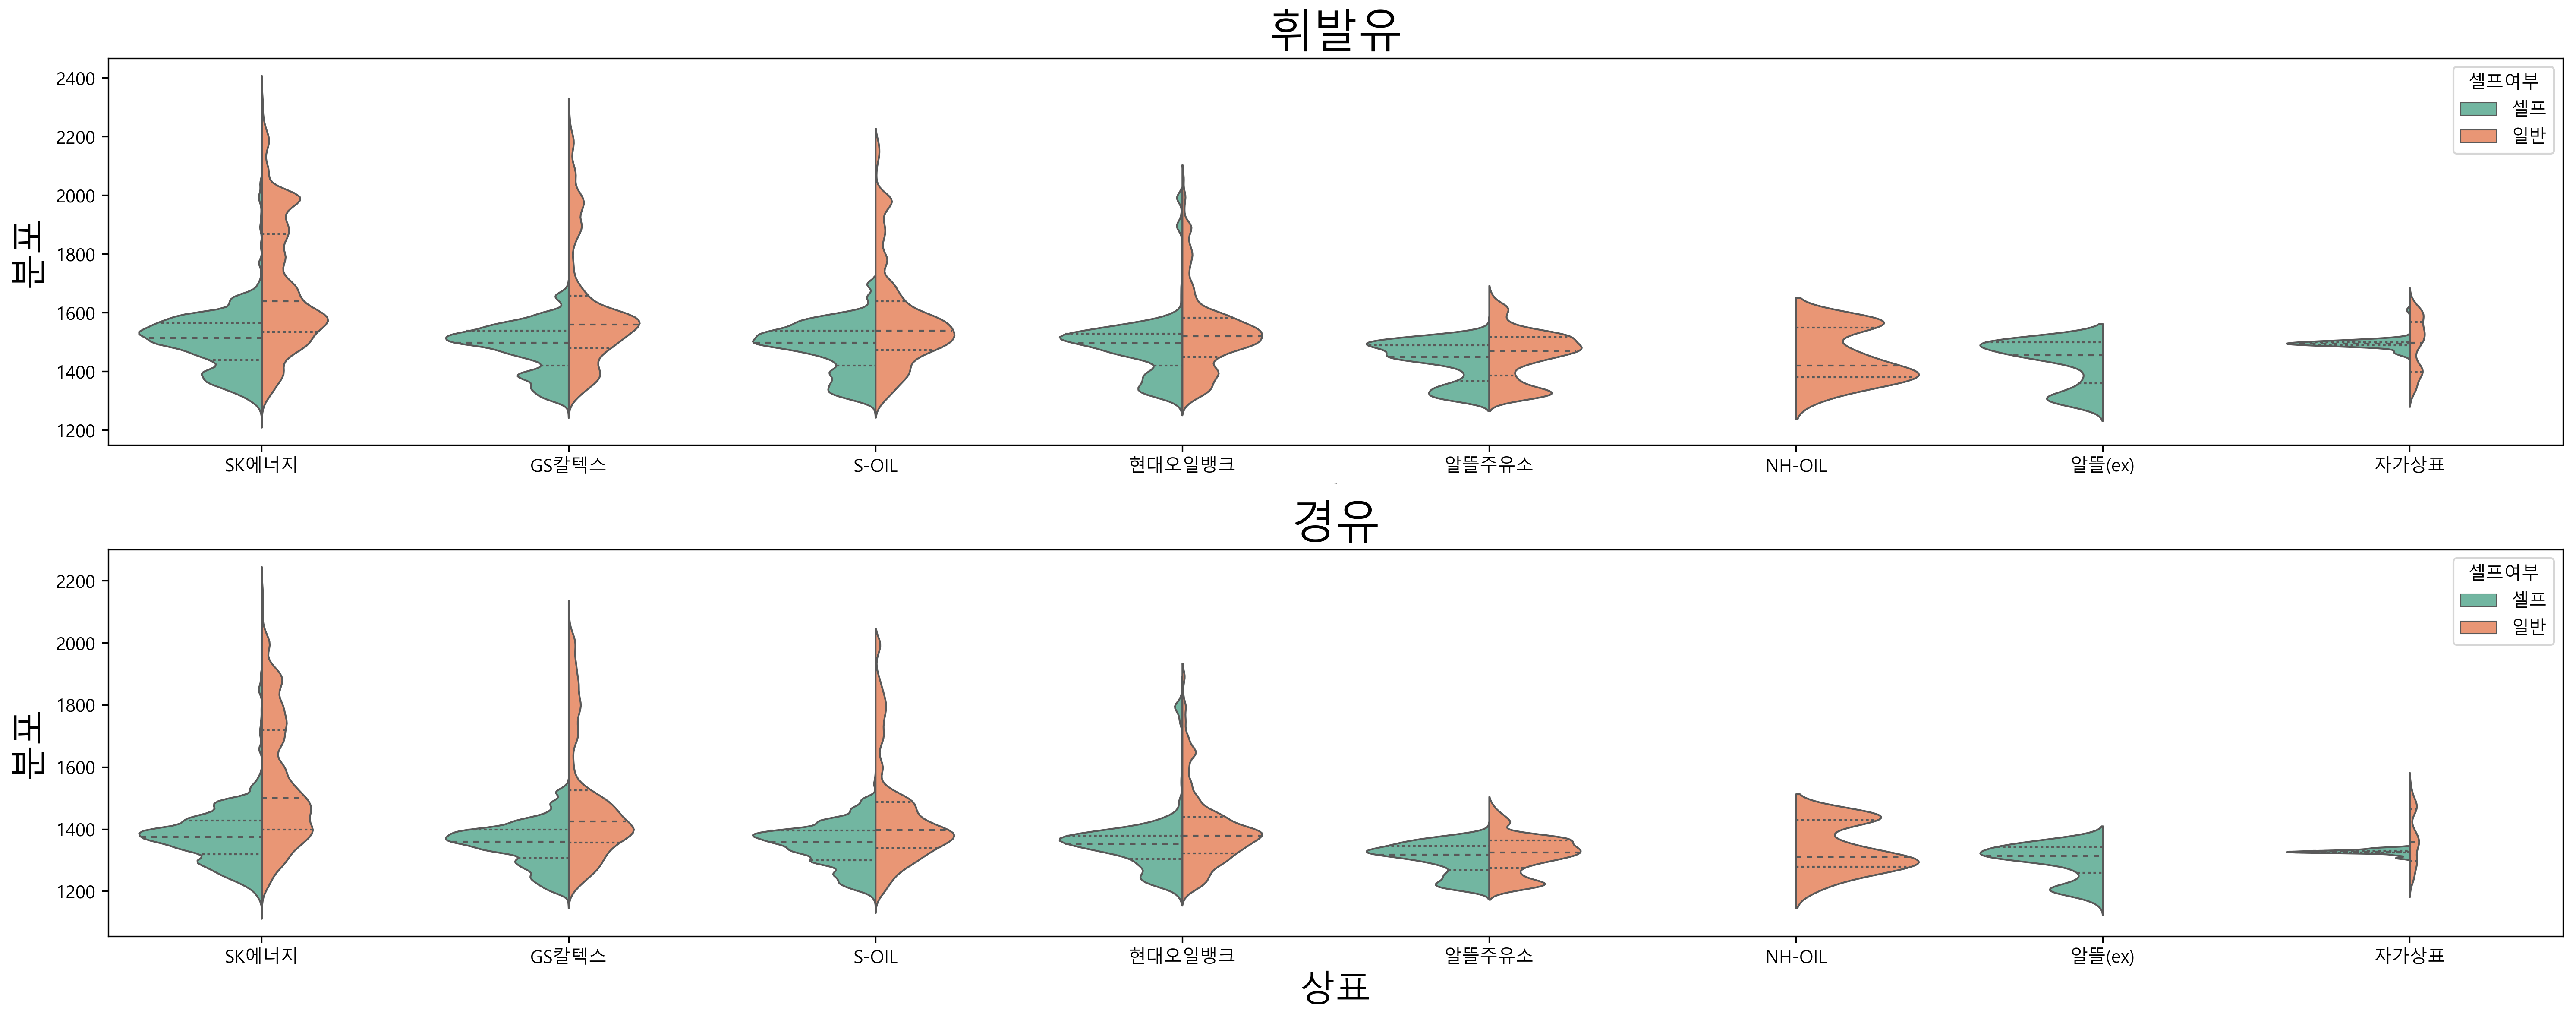

In [59]:
fig, ax = plt.subplots(2, 1, figsize=(20,8), dpi=300)

sns.violinplot(data=df1, x="상표", y="휘발유", hue="셀프여부",
               split=True, inner="quart", linewidth=1, palette="Set2",ax=ax[0]
               )
ax[0].set_title('휘발유', fontsize=25)
ax[0].set_ylabel('분포',fontsize=20)
ax[0].set_xlabel('상표',fontsize=0)

sns.violinplot(data=df1, x="상표", y="경유", hue="셀프여부",
               split=True, inner="quart", linewidth=1, palette="Set2",ax=ax[1]
               )
ax[1].set_title('경유', fontsize=25)
ax[1].set_ylabel('분포',fontsize=20)
ax[1].set_xlabel('상표',fontsize=20)

plt.tight_layout()
plt.show()

#### 8) 서울특별시 전체(일반/셀프) 주유소 분포
- 목적: 지역별 가장 많은 주유소를 갖고 있는 지역 파악
- 시각화 채택 이유: 주유소 갯수 데이터 크기를 내림차순으로 비교 용이

In [60]:
a = df1[['구','상호']].drop_duplicates()
a

,구,상호
0,강남구,(주)동하힐탑셀프주유소
181,강남구,(주)만정에너지
362,강남구,(주)보성 세곡주유소
543,강남구,(주)선진도곡주유소
724,강남구,(주)소모에너지엔테크놀러지 쎈트럴주유소
...,...,...
89866,중랑구,재원에너지㈜ 범아주유소
90047,중랑구,중랑교
90228,중랑구,지에스칼텍스㈜ 대원주유소
90409,중랑구,지에스칼텍스㈜ 소망주유소


<AxesSubplot:title={'center':'지역별 '}>

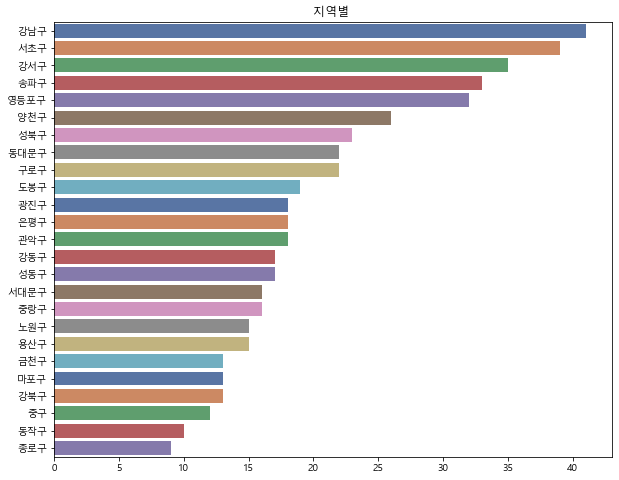

In [61]:
unique = a['구'].value_counts()

plt.figure(figsize=(10,8))
plt.title('지역별 ')
sns.barplot(y=unique.index,x=unique.values, palette="deep")

#### 9) 각 지역의 셀프 여부별 주유소 개수
- 목적: 지역별 셀프여부에 따른 시장점유율 파악
- 시각화 채택 이유: 서울시 내 모든 지역에서 가시성 높은 셀프/일반 단 2개의 데이터 비교 용이 

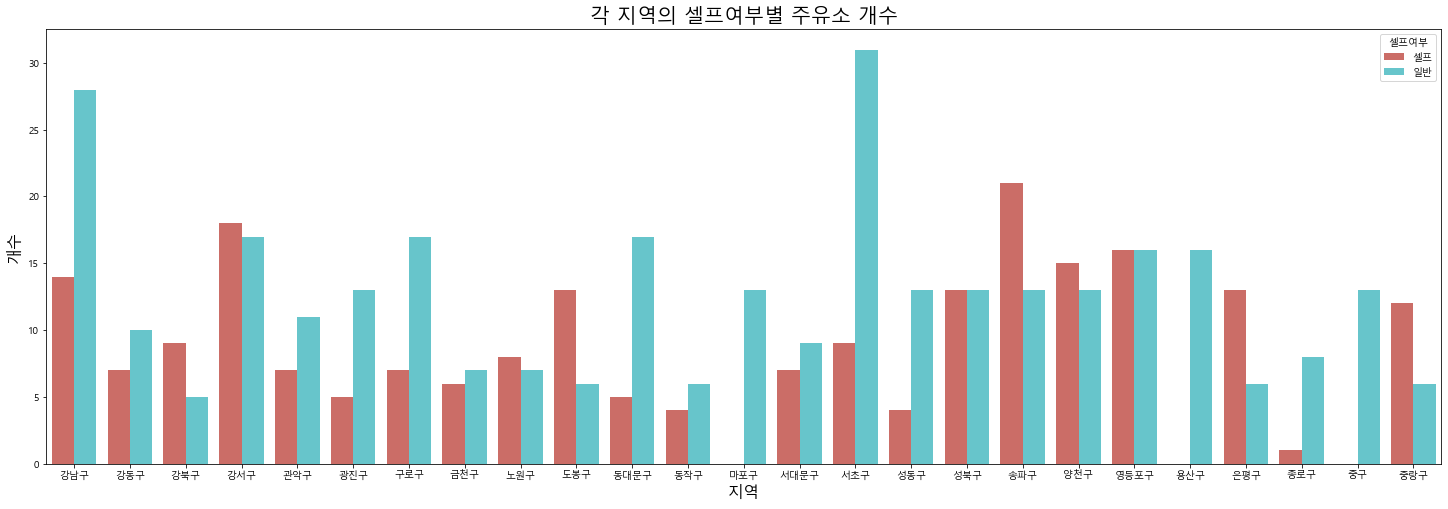

In [62]:
data = df1[['구','상호','상표','셀프여부']].drop_duplicates()

plt.figure(figsize = (25,8))
ax = sns.countplot(x = '구', data = data, palette = 'hls',hue='셀프여부')
ax.set_title(label = '각 지역의 셀프여부별 주유소 개수', fontsize = 20)
ax.set_xlabel(xlabel = '지역', fontsize = 16)
ax.set_ylabel(ylabel = '개수', fontsize = 16)
plt.show()

#### 10) 월별 셀프여부에 따른 휘발유 분포
- 목적: 월별 주유 유형의 점유율 파악
- 시각화 채택 이유: 많은 데이터의 분포와 범위를 한눈에 보기 쉽게 나타냄

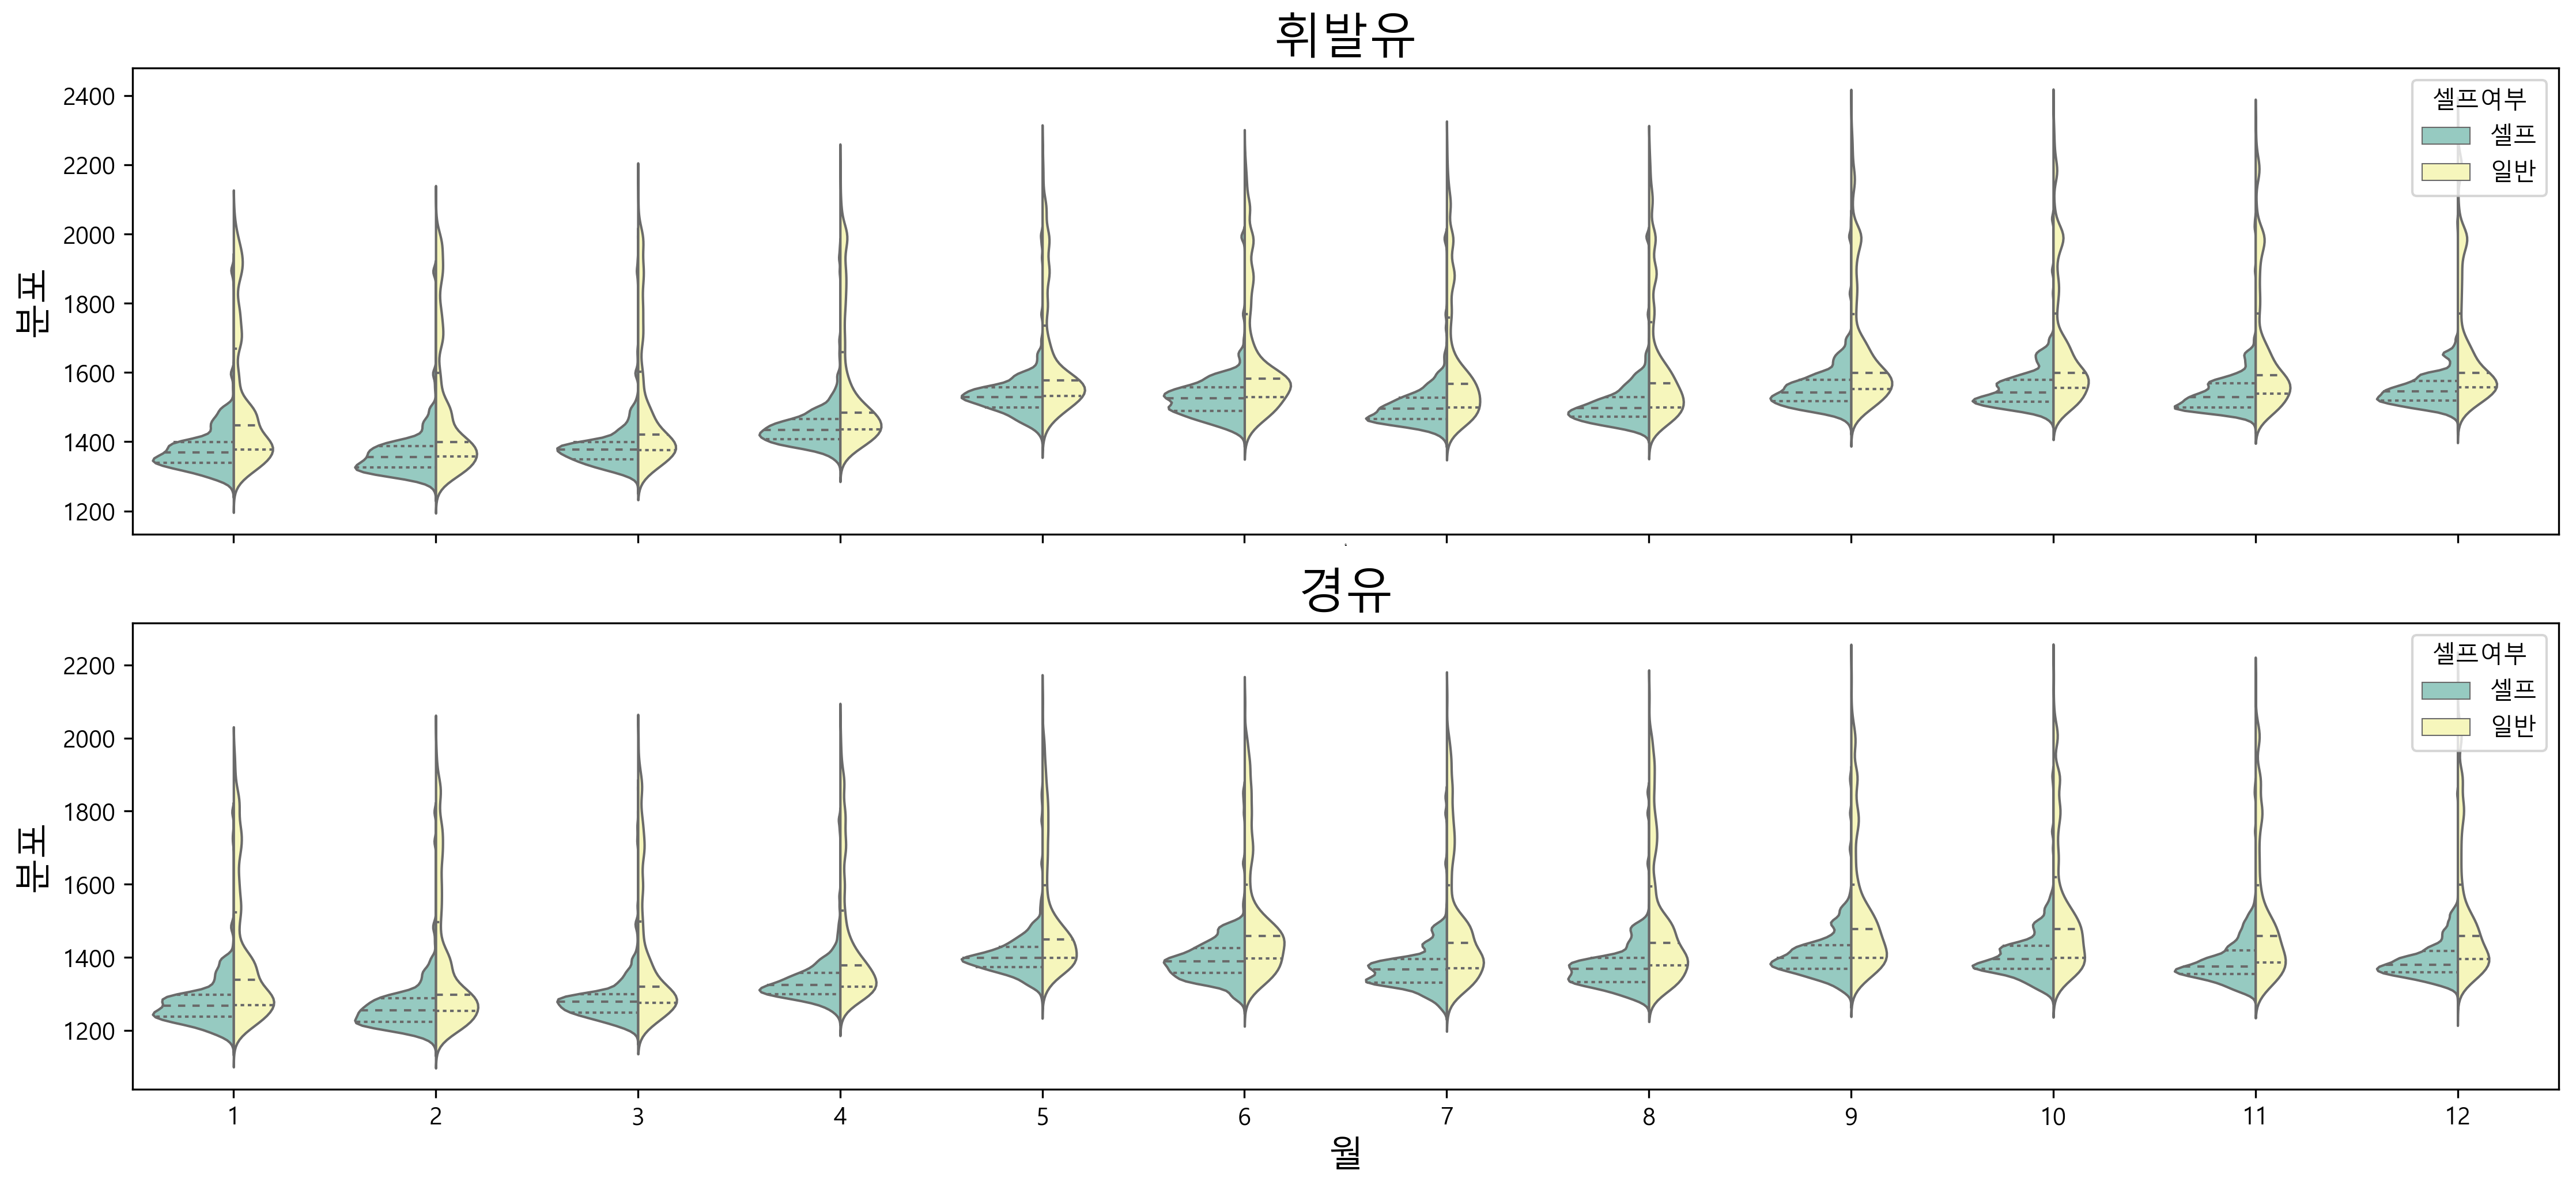

In [63]:
fig, ax = plt.subplots(2, 1, figsize=(15,7), dpi=300, sharex=True)


sns.violinplot(data=df1, x="월", y="휘발유", hue="셀프여부",
               split=True, inner="quart", linewidth=1, palette="Set3",ax=ax[0]
               ) #특정 순서를 암시하지 않는, 그냥 고유한 색상이라고 볼 수 있기 때문니다.
ax[0].set_title('휘발유', fontsize=20)
ax[0].set_xlabel('월',fontsize=0)
ax[0].set_ylabel('분포',fontsize=15)

sns.violinplot(data=df1, x="월", y="경유", hue="셀프여부",
               split=True, inner="quart", linewidth=1, palette="Set3",ax=ax[1]
               )
ax[1].set_title('경유', fontsize=20)
ax[1].set_xlabel('월',fontsize=15)
ax[1].set_ylabel('분포',fontsize=15)

plt.tight_layout()
plt.show()

#### 11) 셀프 주유소와 일반 주유소의 가격 분포
- 목적: 전반적인 데이터들의 결과를 보고 셀프, 일발 주유소의 차이점을 이해할수 있다.

- 시각화 채택 이유: boxplot으로 간편하게 셀프 컬럼을 기준으로 가격 분포를 확인할 수 있게 되었다. 코드의 결과를 보면 직사각형이 데이터의 대다수가 몰려 있는 곳이라는 것은 직관적으로 알 수 있다. 전반적으로 셀프 주유소인 경유가 가격이 낮게 되어 있다.



- 시각화 채택 이유: Swarmplot을 같이 그려보면 좀 더 확실히 데이터의 분포를 볼 수 있다. 셀프 주유소 말고 상표별 데이터를 확인했는데 SK에너지가 높은 가격대를 형성하는 주유소가 많았다. 전반적으로는 현대 오일뱅크가 4대 주유 브랜드 중에서는 저렴하다는 것을 확인할 수 있다.

In [64]:
stations

,Oil_store,주소,가격,셀프,상표,구
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1435.0,Y,SK에너지,강남구
1,GS칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,1445.0,Y,GS칼텍스,강남구
2,방죽주유소,서울 강남구 밤고개로 215 (율현동),1459.0,Y,GS칼텍스,강남구
3,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1463.0,Y,SK에너지,강남구
4,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1473.0,Y,현대오일뱅크,강남구
...,...,...,...,...,...,...
520,SK논현주유소,서울 강남구 논현로 747 (논현동),1938.0,N,SK에너지,강남구
521,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),1953.0,N,GS칼텍스,강남구
522,학여울주유소,서울 강남구 남부순환로 3170 (일원2동),1971.0,N,GS칼텍스,강남구
523,(주)소모에너지엔테크놀러지 쎈트럴주유소,서울 강남구 삼성로 335,1988.0,N,GS칼텍스,강남구


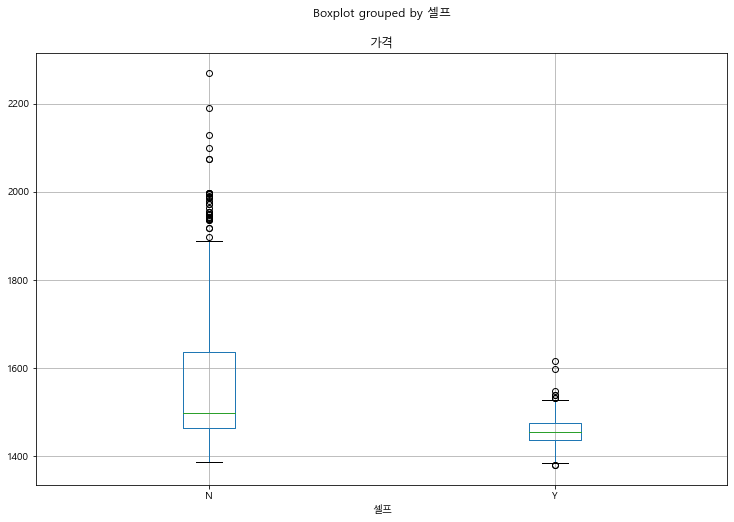

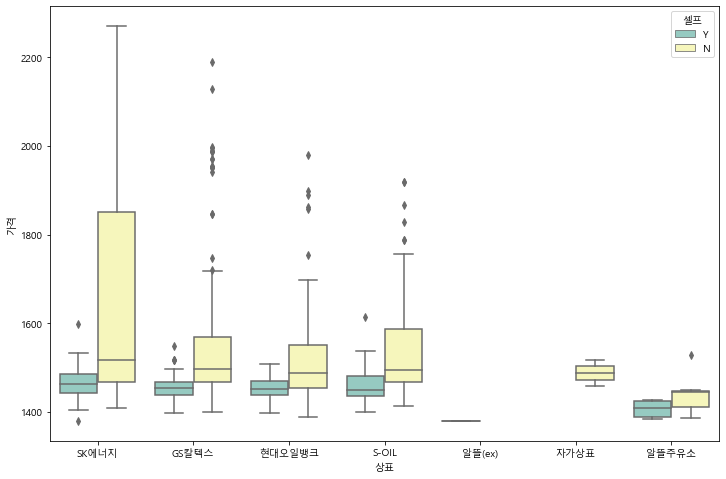

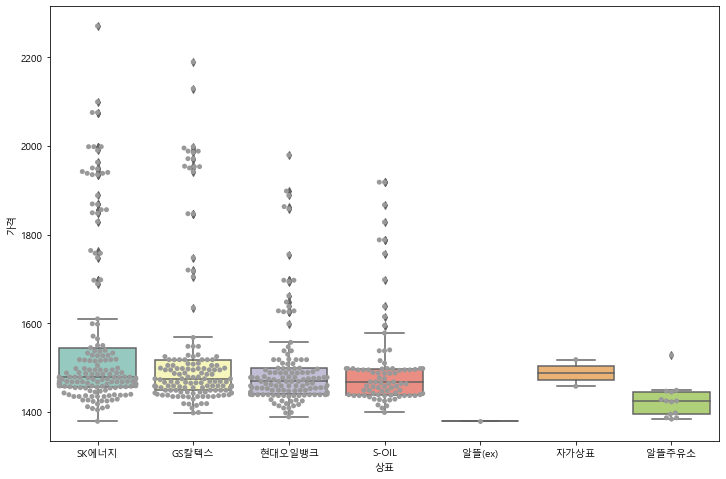

In [65]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=stations, color='.6')
plt.show()

##### 결과
현대 오일뱅크, GS칼텍스, S-Oil, SK에너지 모두 셀프 주유소가 저렴하다. SK에너지는 그 중 가격대가 가장 높게 형성되어 있는 것을 알 수 있다.

    결과
    현대 오일뱅크, GS칼텍스, S-Oil, SK에너지 모두 셀프 주유소가 저렴하다. SK에너지는 그 중 가격대가 가장 높게 형성되어 있는 것을 알 수 있다.

    좋았던 점 : 우선 3명이 팀프로젝트로 진행해야하기 때문에 다양한 의견들이 나옴, 멤버들 끼리 서로 도움을주고 피드백을 받으면서 몰랐던 점이나, 착각했던 부분을 쉽게 알 수 있었음. 새로운 그래프를 응용하거나 설계하면서 새로운 정보를 알게되면서 자연스럽게 학습이 되었다.

    아쉬웠던 점 : 새로운 그래프를 응용하거나 설계하면서 새로운 정보를 알게되면서 자연스럽게 학습이 되어서 힘들었고, 제 응용 실력에 아쉬웠습니다.

    좋았던점

    전처리랑 그래프 만드는 감 잡음
    다양한 아이디어와 분석과정 논의가 이루어진 점
    아쉬웠던점 = 시간부족

    좋았던점 각각의 시각화 그래프함수에 대한 인자값을 어떻게 주어야 하는지 명확하게 알게 되었다.

    아쉬웠던점 시각화에 너무 시간을 많이 소비해서 분석결과가 많이 예리하지 못하였다. 전략을 짜는데에 좀 더 집중할 필요가 있을 것 같다.